In [194]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [195]:
creditcard_df= pd.read_csv("Marketing_data.csv")

In [196]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [197]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [198]:
creditcard_df.shape

(8950, 18)

In [199]:
# CUST_ID Column i do not need
creditcard_df= creditcard_df.drop('CUST_ID' , axis =1)

In [200]:
creditcard_df.shape

(8950, 17)

In [201]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [202]:
filter =creditcard_df["ONEOFF_PURCHASES"]

In [203]:
creditcard_df[filter == 40761.250000 ]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [204]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [205]:
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.211760000006]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<AxesSubplot:>

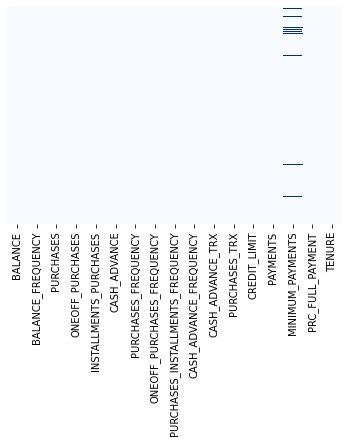

In [206]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [207]:
#the above we see the several missing values in "Minimum_payment" column But there is also some missing values in ..
#... another acoumn also. but because they are some not so some so we can not see on the plot. so use this code also 

creditcard_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [208]:
#Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
#creditcard_df.loc[creditcard_df["MINIMUM_PAYMENTS"].isnull()==True,  "MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].mean()

In [209]:
#creditcard_df["MINIMUM_PAYMENTS"]

In [210]:
# copy code 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [211]:
creditcard_df.info()
#A very important waring that when I replace MINIMUM_PAYMENTS's isnull values with mean . now this column became an object or string values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [212]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [213]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
#creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), "CREDIT_LIMIT"]=creditcard_df["CREDIT_LIMIT"].mean

In [214]:
#copy code and the difference is I did not use 1st bracket  after .mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [215]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [216]:
creditcard_df.info()
#A very important waring that when I replace CREDIT_LIMIT's isnull values with mean . now this column became an object or string values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<AxesSubplot:>

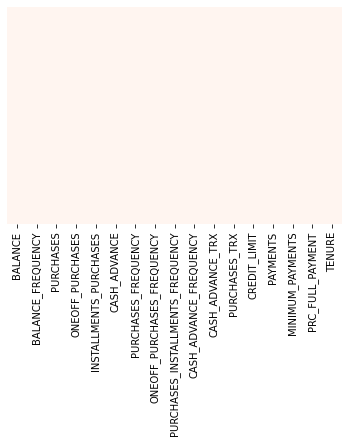

In [217]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Reds")

In [218]:
#so we covert these columns agian back to float
#creditcard_df['MINIMUM_PAYMENTS'].astype('float')

In [219]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()


0

In [220]:
creditcard_df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [221]:
#check how many columns 
n=len(creditcard_df.columns)
n

17

In [222]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

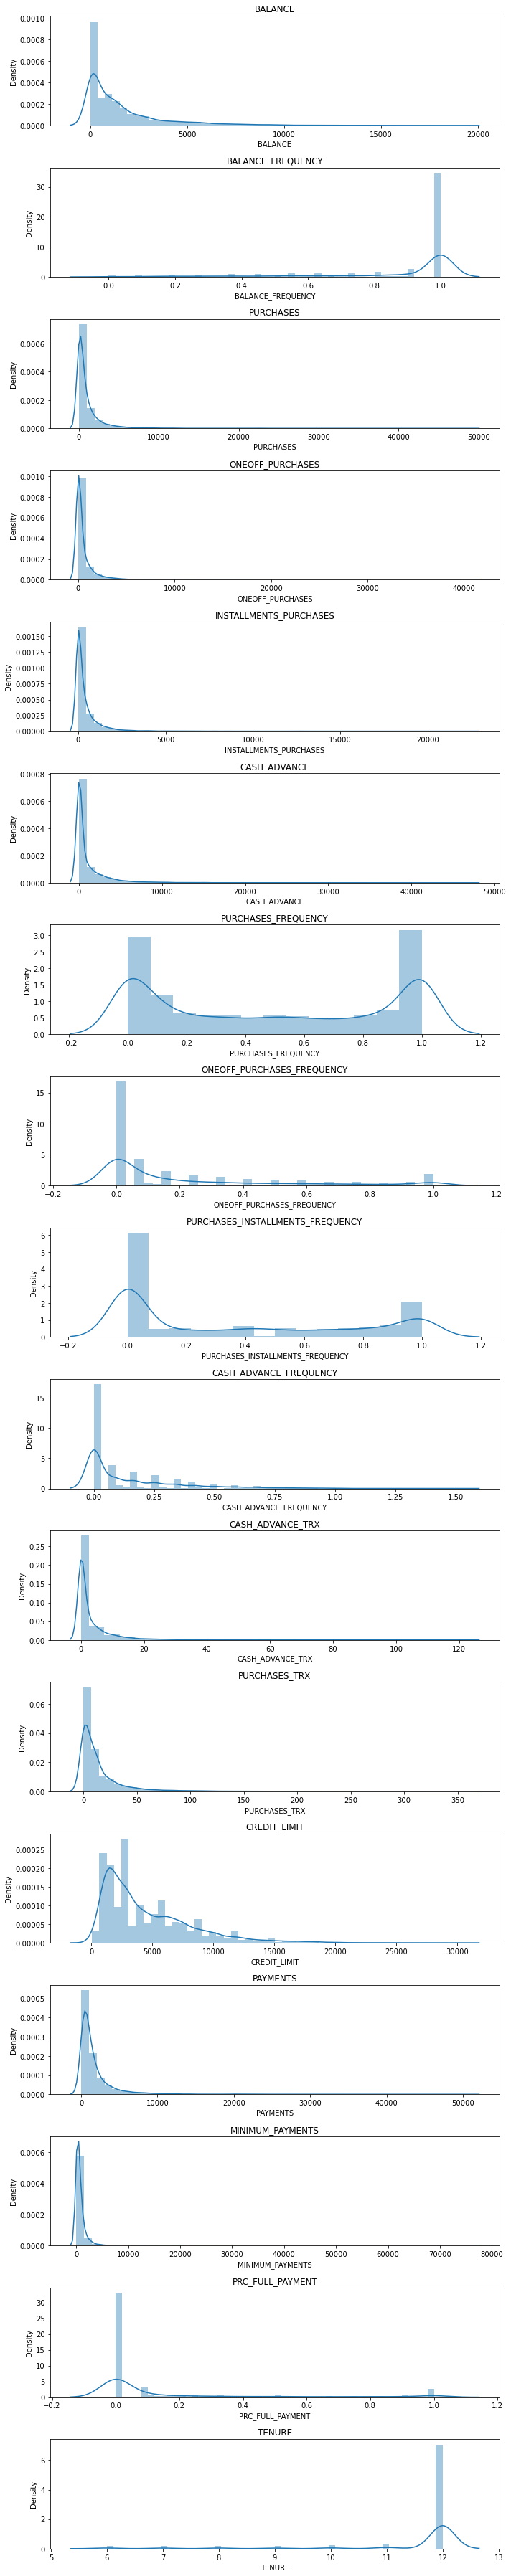

In [223]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    #displot() is the new distplot() with better capabilities and distplot() is deprecated starting from this Seaborn version
    sns.distplot(creditcard_df[creditcard_df.columns[i]])
    plt.title(creditcard_df.columns[i])
    
    
    
plt.tight_layout()

<AxesSubplot:>

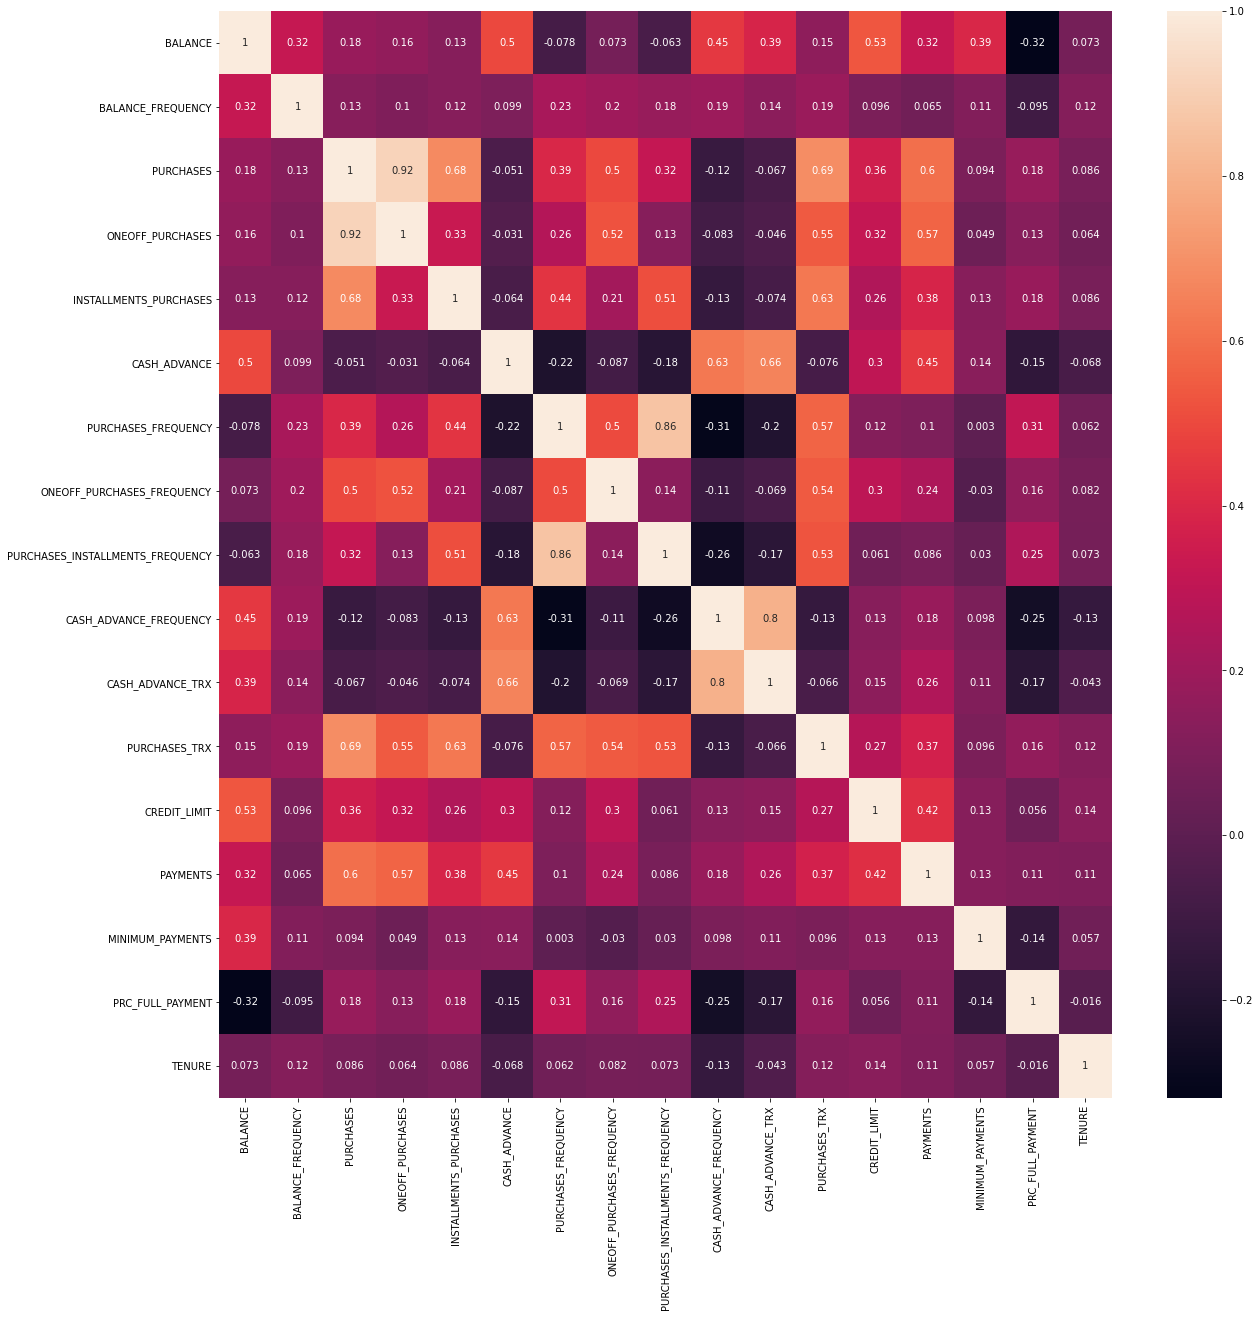

In [224]:
#lets see the corelations 
corelations= creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corelations, annot=True)

In [236]:
# Let's scale the data first
scaler=  StandardScaler()
creditcard_df_scaled= scaler.fit_transform(creditcard_df)


In [237]:
creditcard_df_scaled.shape

(8950, 17)

In [238]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [239]:
type(creditcard_df_scaled)

numpy.ndarray

In [246]:
#this code through error message . 
#scores_1=[]
#range_values= range(1, 20) 
#for i in range_values:
    
    #kmeans= KMeans(n_clusters=i)
    
    #kmeans.fit(creditcard_df_scaled)
    #scores_1.append(kmeans.inertia_)
    
#see the sloved code below and explanation why we get this error 

# https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute
    

In [247]:
scores_1 = []

range_values = range(2, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

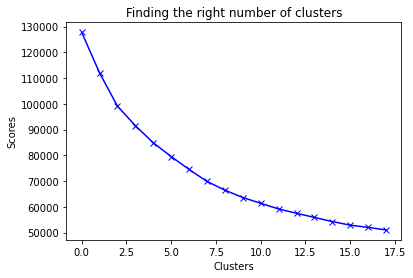

In [248]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

In [250]:
#Now we will APPLY K-MEANS METHOD

kmeans= KMeans(8)
kmeans.fit(creditcard_df_scaled)

KMeans()

In [251]:
labels= kmeans.labels_

In [252]:
labels

array([1, 0, 2, ..., 3, 3, 3])

In [256]:
kmeans.cluster_centers_.shape

(8, 17)

In [258]:
cluster_centers= pd.DataFrame(data=kmeans.cluster_centers_ , columns= [creditcard_df.columns])

In [259]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.688837,0.392738,-0.216640,-0.154862,-0.227802,2.012511,-0.469247,-0.206878,-0.410191,1.913268,1.919986,-0.264911,1.032213,0.821686,0.553388,-0.389790,0.070705
1,0.012993,0.403919,-0.357350,-0.241897,-0.400431,-0.093298,-0.854506,-0.395449,-0.755791,0.105416,-0.026341,-0.482246,-0.303945,-0.249332,-0.011399,-0.455335,0.273216
2,-0.132616,0.400605,0.540935,0.671054,0.046007,-0.331239,0.979826,1.905062,0.171297,-0.412879,-0.329926,0.618514,0.434842,0.144626,-0.157930,0.444145,0.268773
3,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
4,-0.701257,-2.137189,-0.310069,-0.234784,-0.301700,-0.322766,-0.553110,-0.441424,-0.438831,-0.521893,-0.376564,-0.418536,-0.176209,-0.202135,-0.257092,0.287615,0.201638
5,-0.361213,0.333941,-0.034646,-0.241953,0.362400,-0.363308,0.992375,-0.382539,1.204085,-0.473336,-0.360219,0.189130,-0.260602,-0.214980,-0.030617,0.309752,0.256362
6,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
7,1.039400,0.464856,2.504641,1.808428,2.599812,-0.161205,1.164502,1.562982,1.272947,-0.286097,-0.150710,3.134487,1.297181,1.439786,0.560536,0.253915,0.337460


In [262]:
# what does these numbers above mean, In order to understand what these numbers mean, let's perform inverse transformation

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers.head()
# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.200977e+10,1.139539,2.468680e+09,9.249771e+08,1.680649e+08,2.286608e+10,0.735801,0.275380,0.541087,0.182931,786.910468,5400.328573,1.092309e+11,3.446416e+10,1.169967e+10,0.202070,47.726601
1,6.898177e+09,1.139688,1.096400e+09,5.270034e+08,4.041106e+07,3.446353e+09,0.710895,0.270374,0.519393,0.168444,168.347916,2062.708431,4.487437e+10,8.480603e+09,4.551273e+09,0.200430,48.211963
2,5.585183e+09,1.139644,9.856967e+09,4.701565e+09,3.705379e+08,1.252061e+09,0.829483,0.331449,0.577589,0.164291,71.865762,18967.113119,8.045830e+10,1.803826e+10,2.696661e+09,0.222936,48.201314
3,3.743150e+09,1.129640,1.770799e+09,6.526265e+08,1.241828e+08,4.927140e+09,0.752991,0.273265,0.552696,0.170056,176.624866,3512.084733,3.239041e+10,4.992867e+09,2.051163e+09,0.212158,39.883104
4,4.575759e+08,1.105907,1.557506e+09,5.595258e+08,1.134195e+08,1.330201e+09,0.730380,0.269153,0.539290,0.163418,57.043638,3041.096268,5.102678e+10,9.625650e+09,1.441595e+09,0.219020,48.040411


In [263]:
labels.shape # Labels associated to each data point

(8950,)

In [264]:
labels.max() # we have 8 cluster in our KMeans and they are from 0 to 7 

7

In [265]:
labels.min()

0

In [266]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 0, 2, ..., 5, 5, 5])

In [269]:
#lets see our data again
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [271]:
#as we have applied our KMeans on the df.and it cluster our df that we save it in 'label' variale. now we assign it to our.. .
#... original df like which datapoint belong to which cluster 

creditcard_df_cluster= pd.concat([creditcard_df , pd.DataFrame({"cluster": labels})], axis= 1)

In [273]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


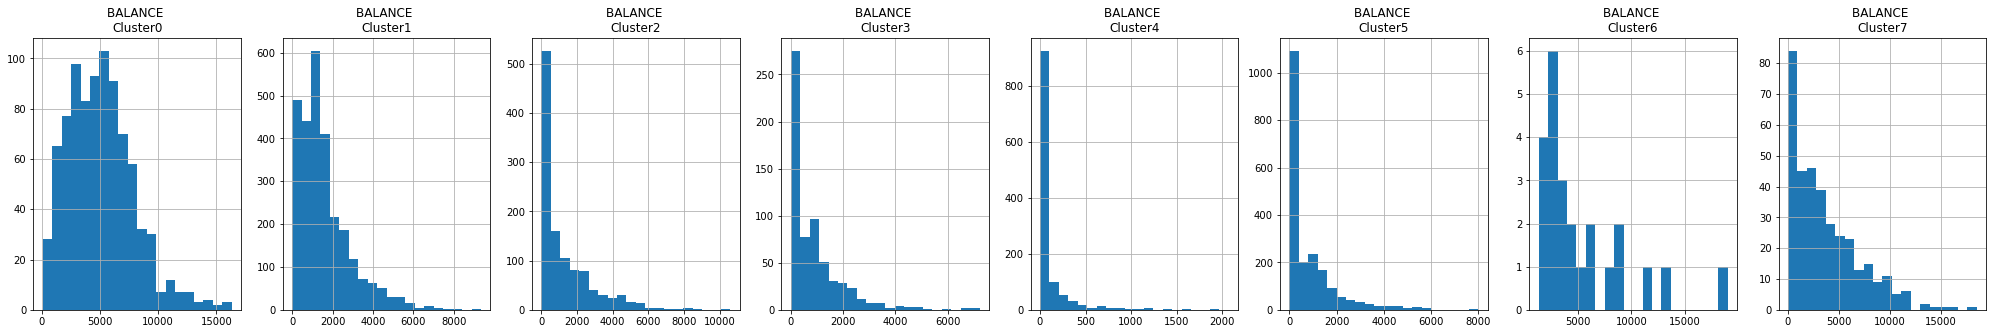

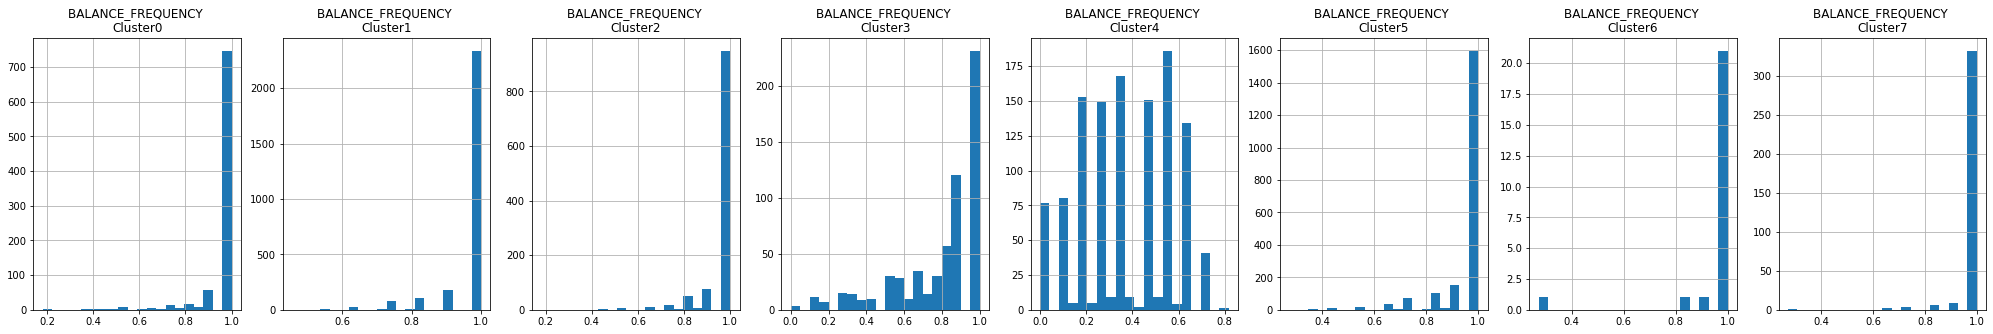

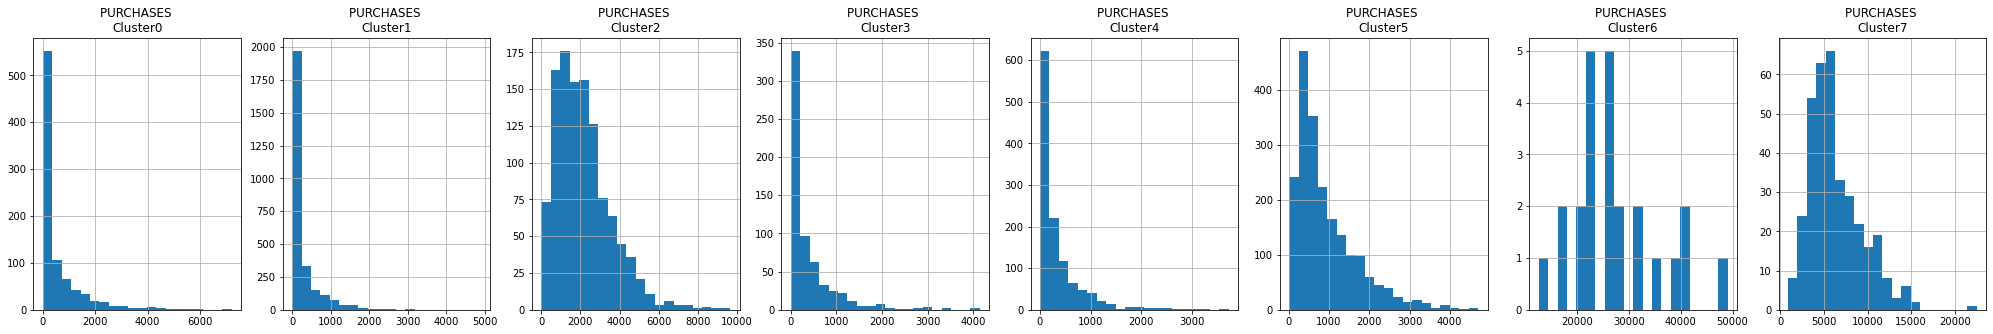

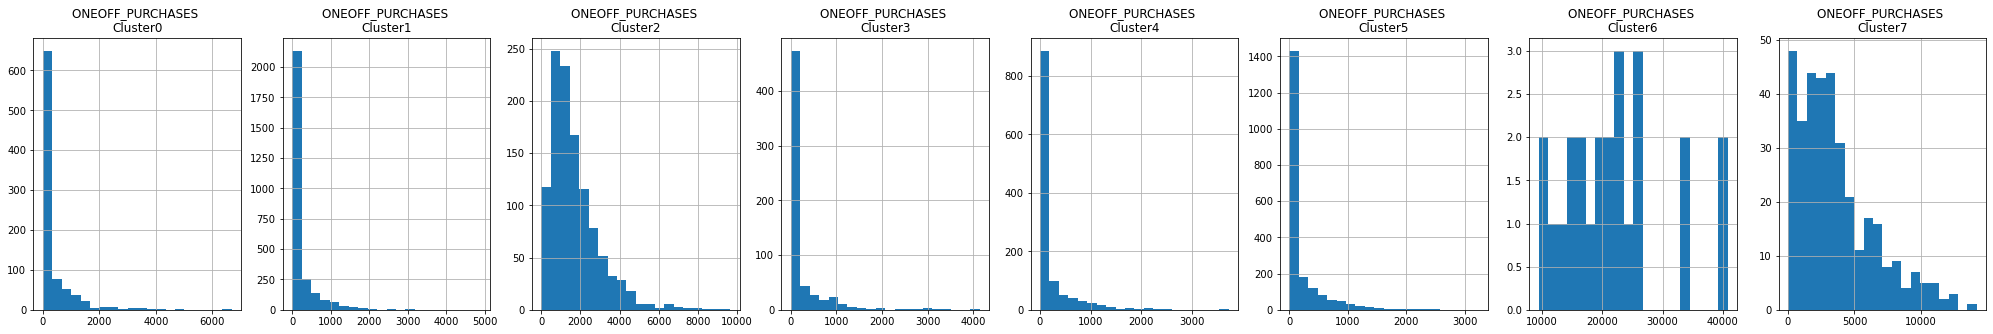

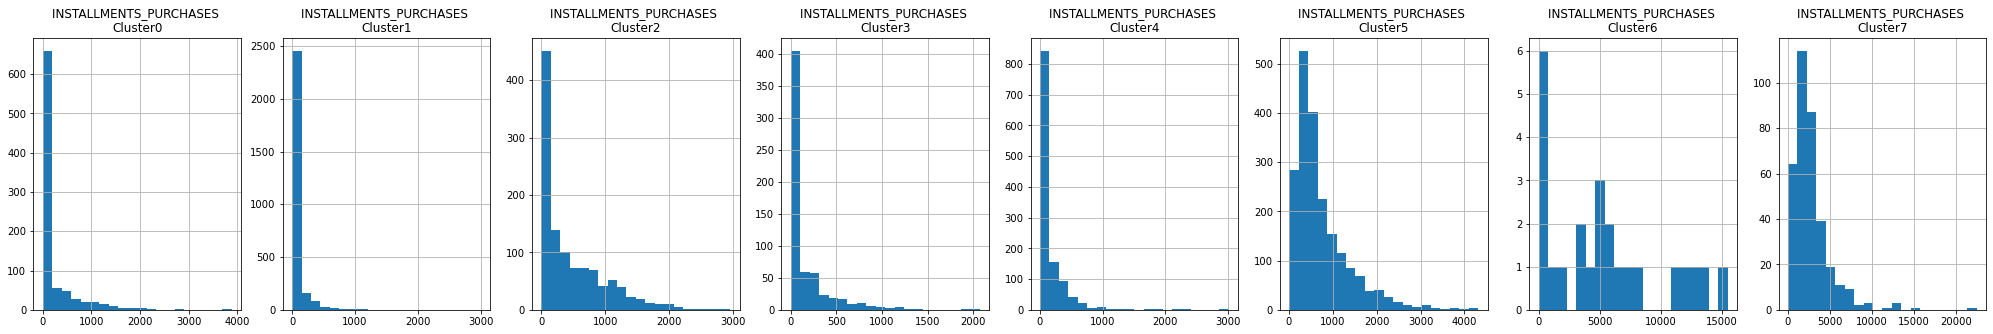

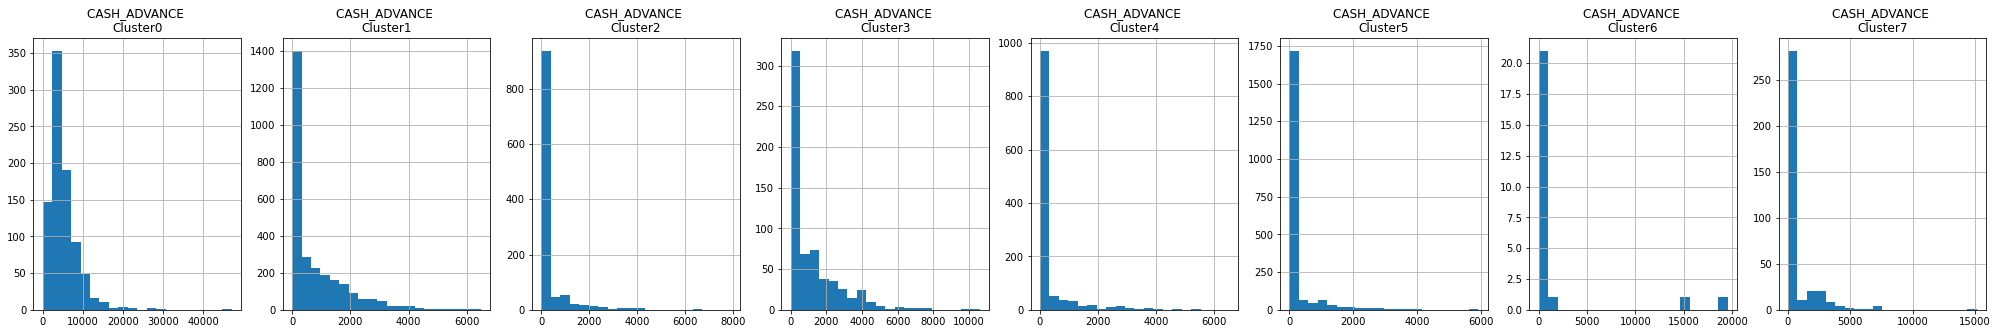

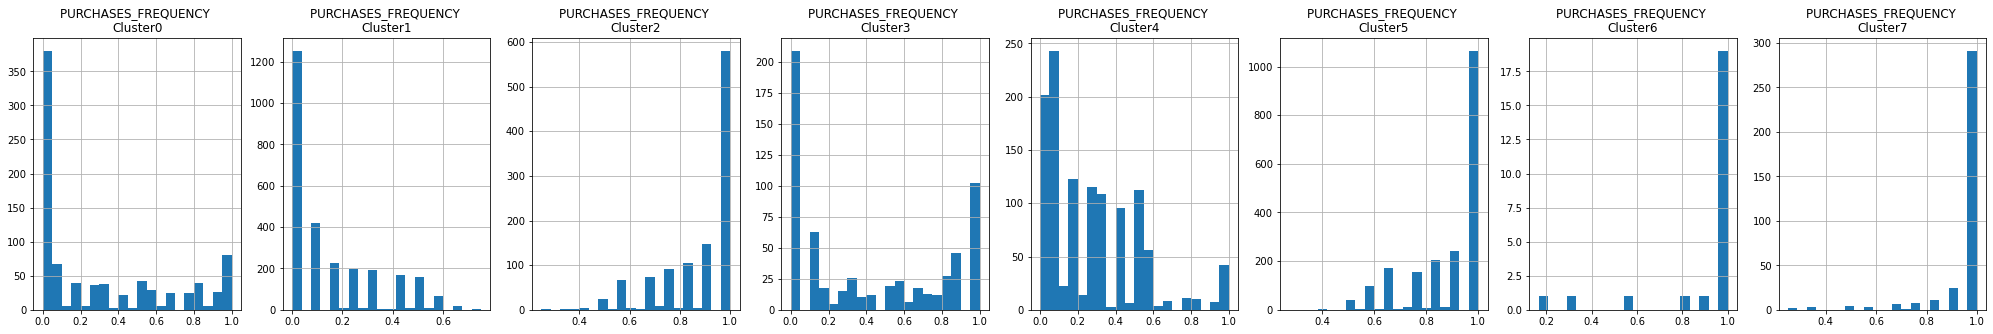

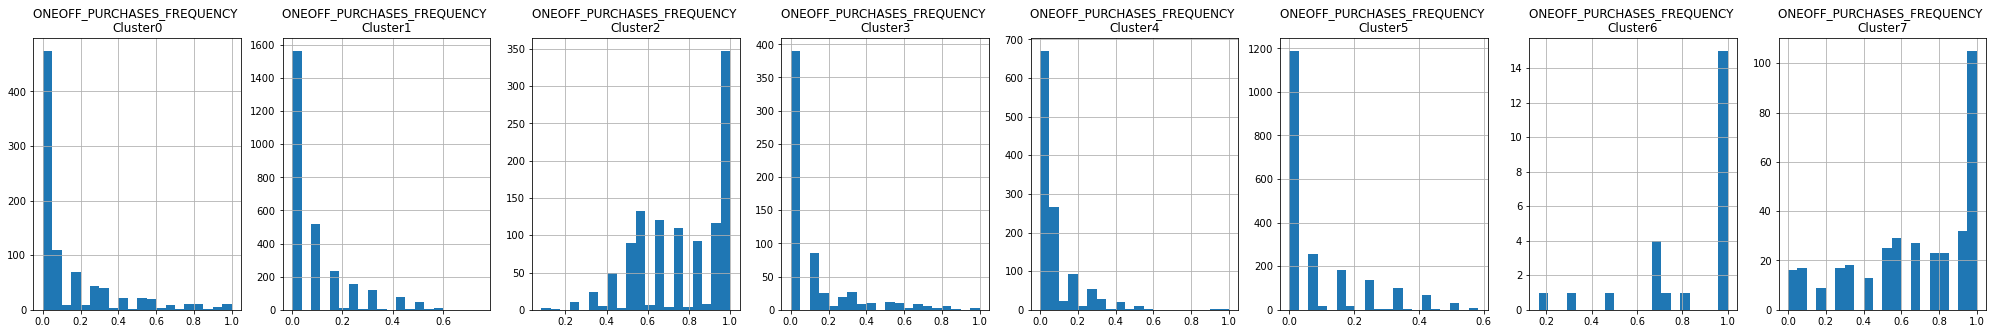

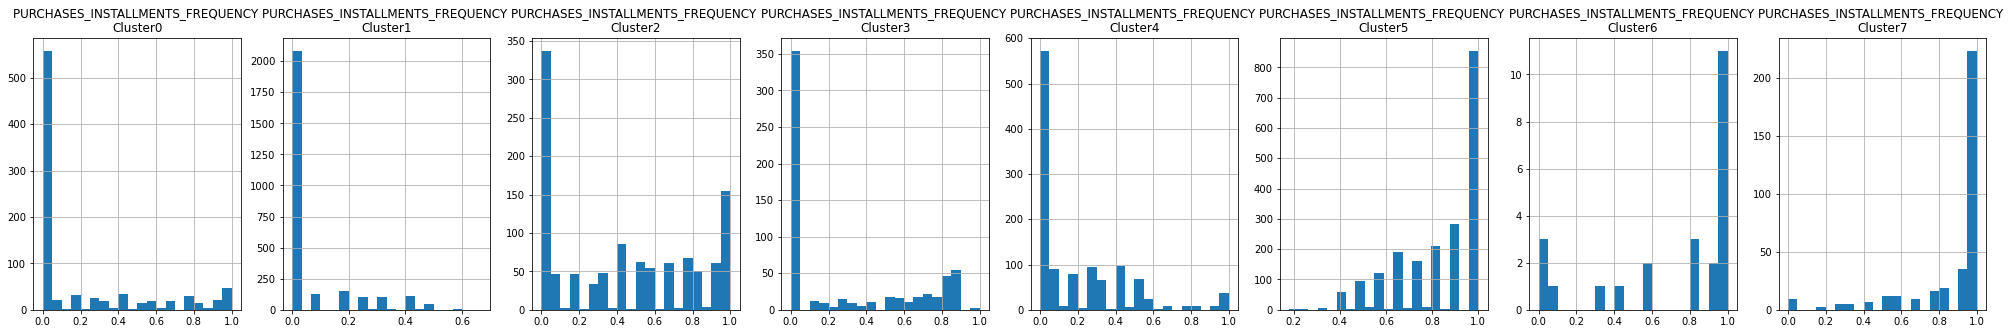

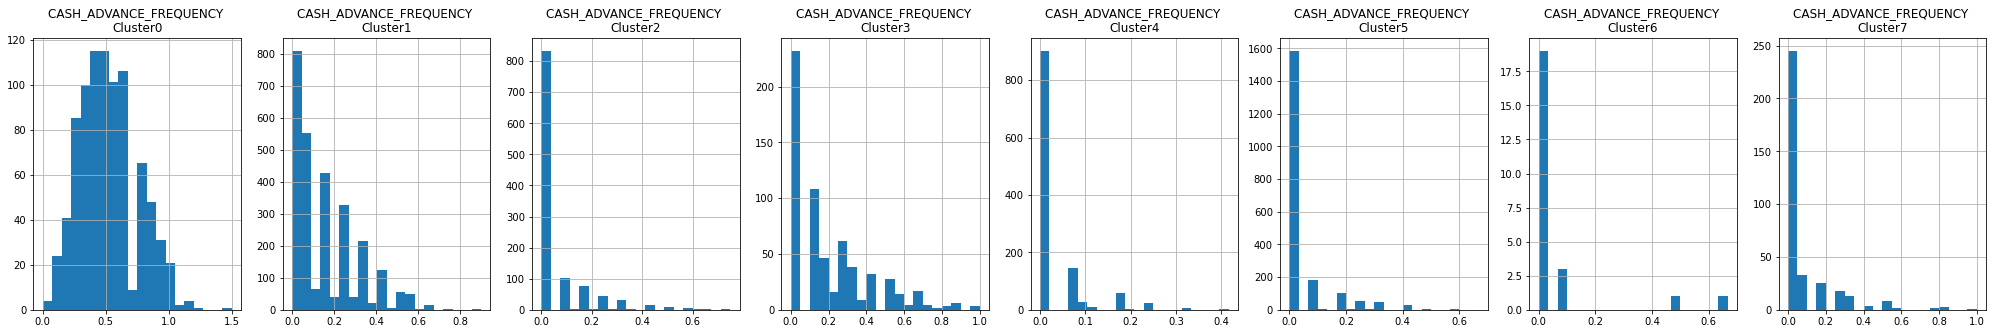

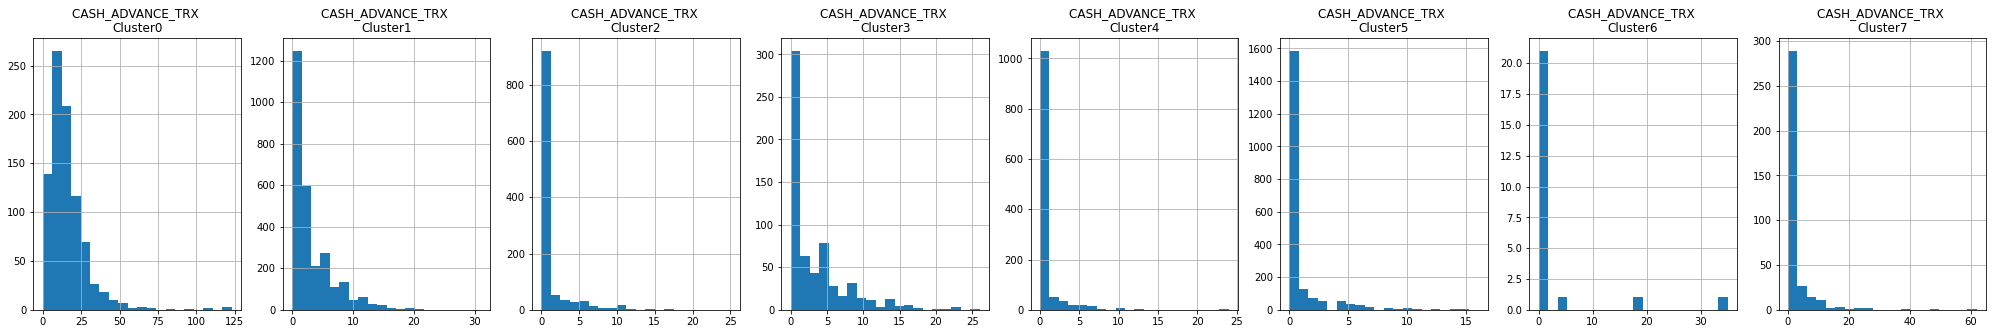

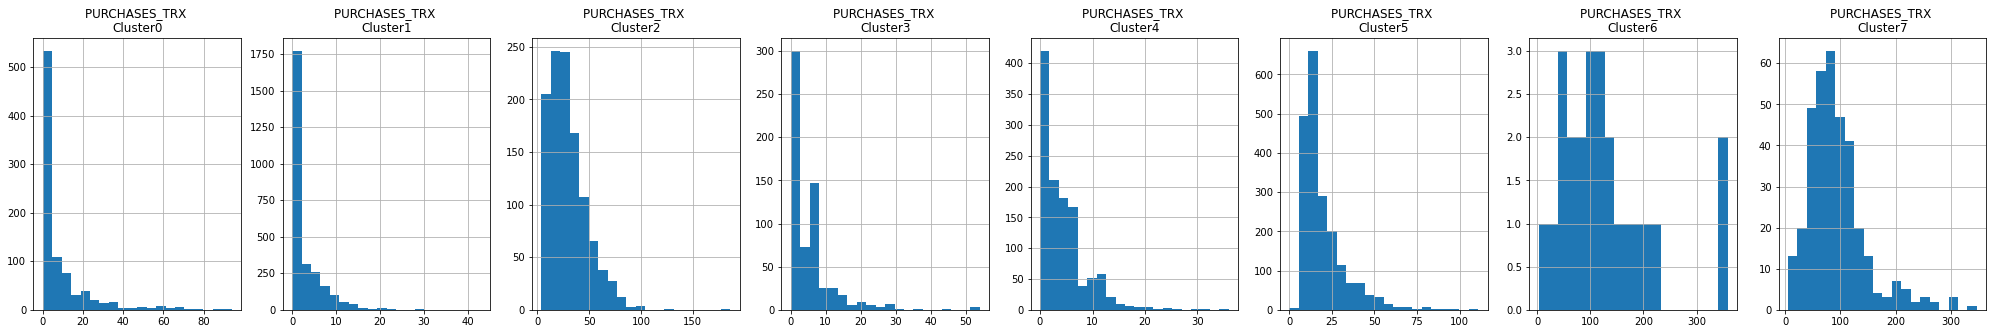

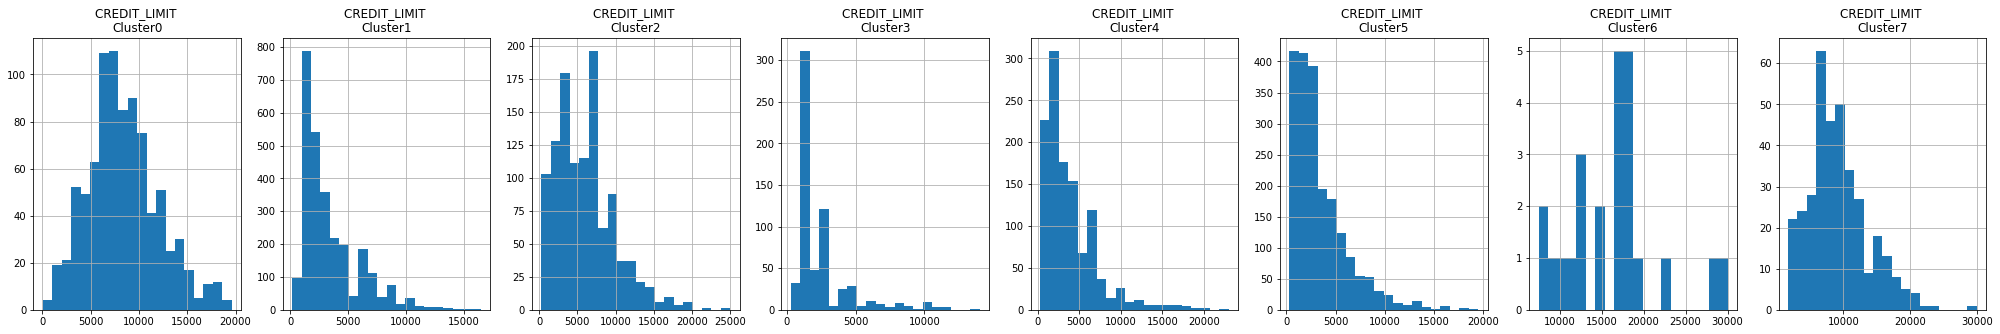

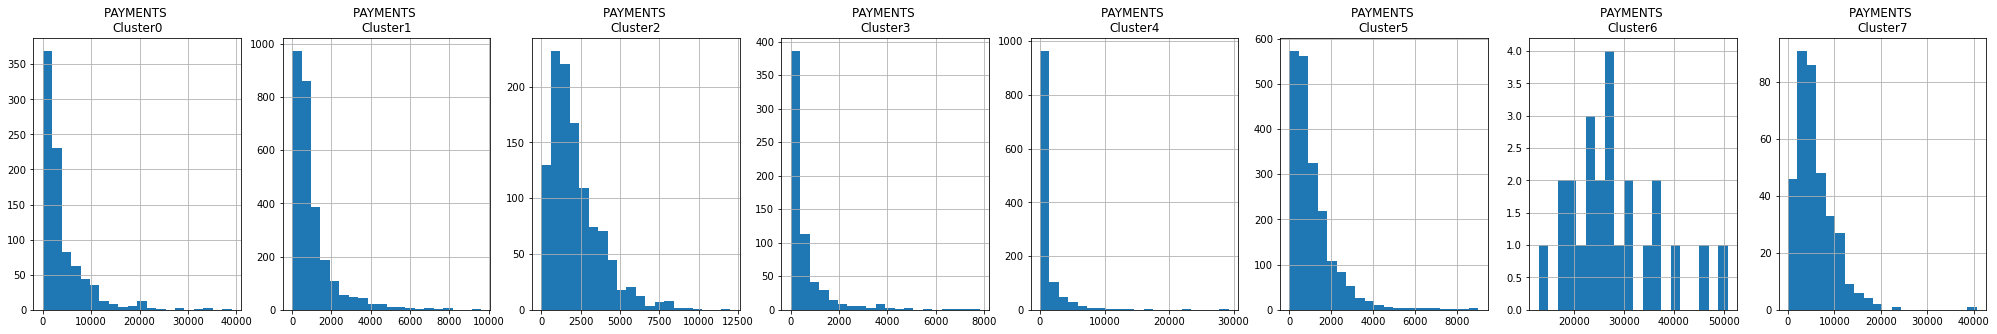

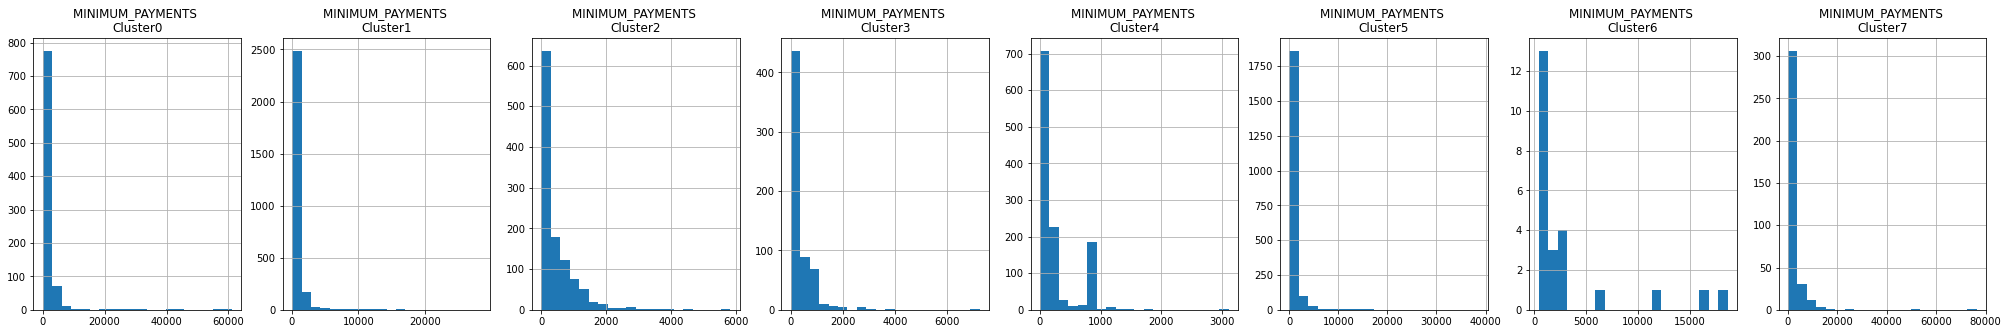

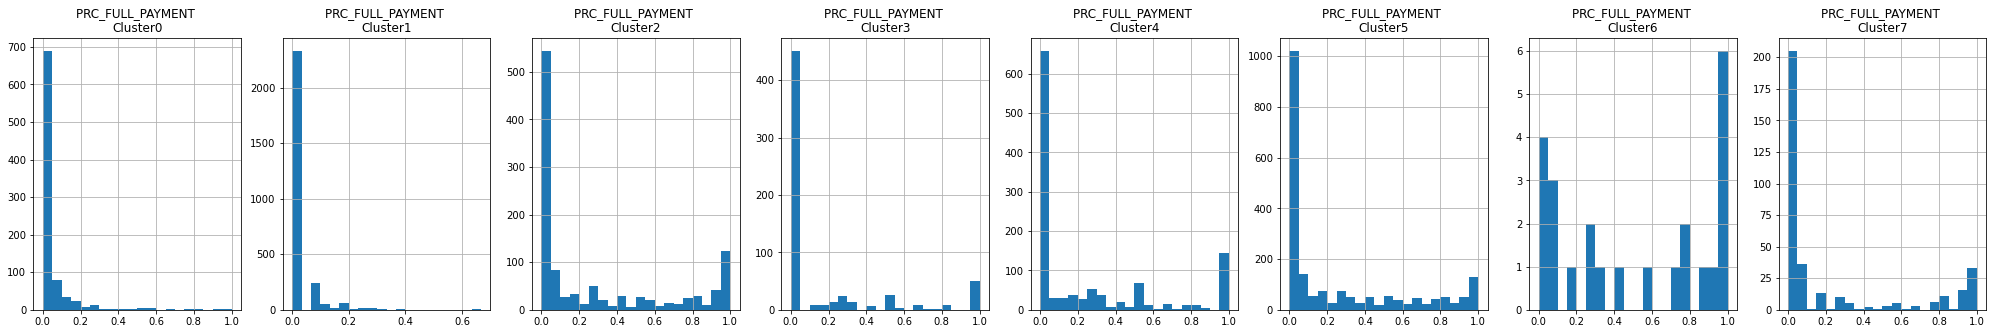

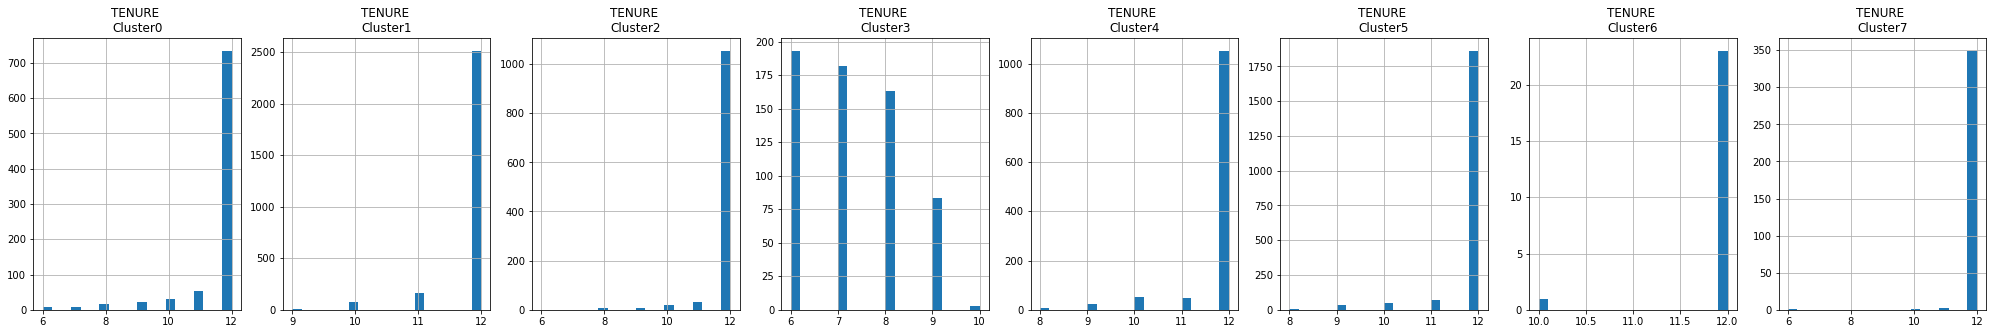

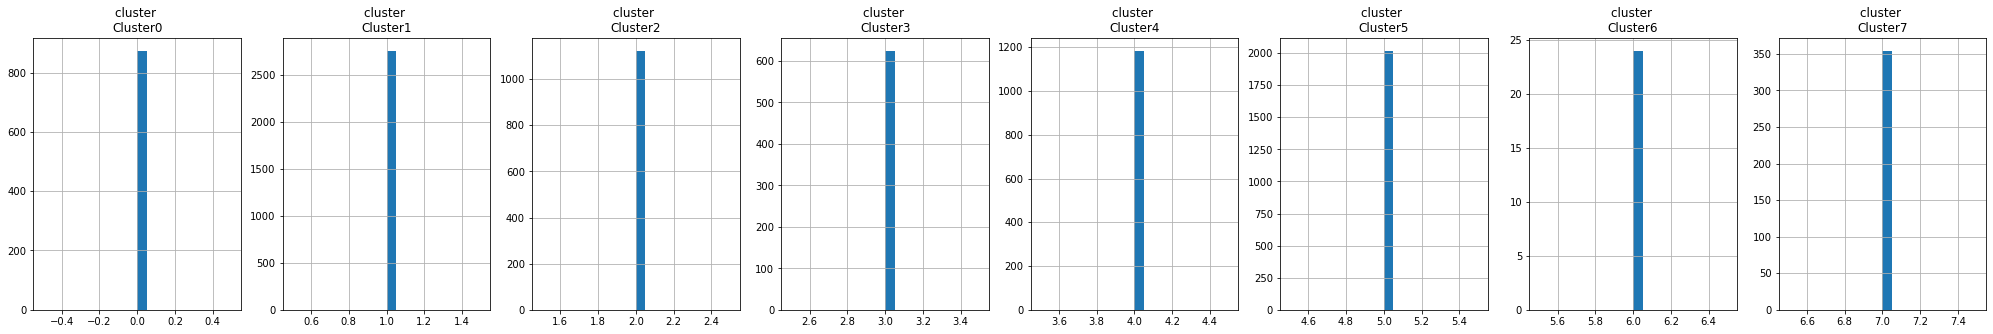

In [282]:
# Plot the histogram of various clusters
for i in  creditcard_df_cluster.columns:
    plt.figure(figsize=(35,5))
    for j in range(8): #cause we have 8 cluster
        plt.subplot(1, 8 , j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster["cluster"]==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster{}'.format(i,j))
        
plt.show()
    

In [284]:
#let's use the PCA 

pca= PCA(n_components=2)
principal_comp =pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221958, -1.07645579],
       [-1.13829043,  2.50642984],
       [ 0.96968111, -0.38349053],
       ...,
       [-0.92620405, -1.81077806],
       [-2.33655275, -0.65795336],
       [-0.55642504, -0.40044265]])

In [286]:
pca_df= pd.DataFrame(data=principal_comp, columns=['pca1' , 'pca2'] )

In [287]:
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076456
1,-1.138290,2.506430
2,0.969681,-0.383491
3,-0.873627,0.043160
4,-1.599433,-0.688585


In [288]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076456,1
1,-1.138290,2.506430,0
2,0.969681,-0.383491,2
3,-0.873627,0.043160,1
4,-1.599433,-0.688585,1


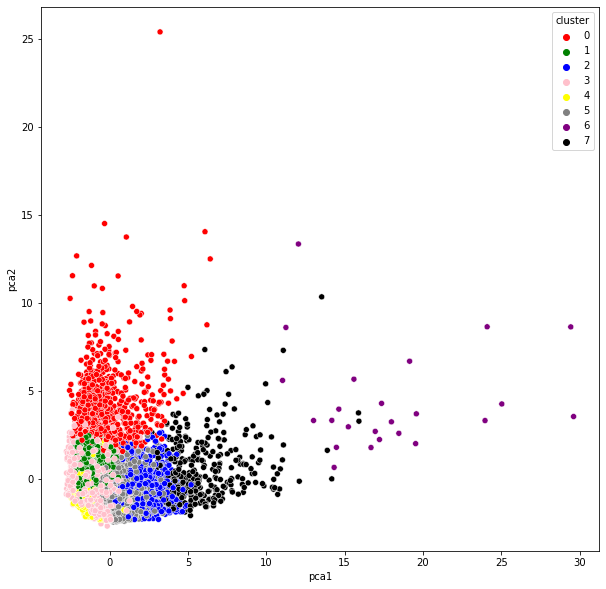

In [289]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [293]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

# from keras.optimizers import SGD #this will through error 
# so write this way

from tensorflow.keras.optimizers import SGD

In [297]:
input_df= Input(shape=(17,)) # cause we know that our df has 17 features 

x=Dense(7, activation="relu")(input_df)
x=Dense(500, activation="relu" , kernel_initializer="glorot_uniform")(x)
x=Dense(500, activation="relu" , kernel_initializer="glorot_uniform")(x)
x=Dense(2000, activation="relu" , kernel_initializer="glorot_uniform")(x)
encoded= Dense(10, activation="relu" , kernel_initializer="glorot_uniform")(x)#this is the bottle neck , part 
x=Dense(2000, activation="relu" , kernel_initializer="glorot_uniform")(encoded)
x=Dense(500, activation="relu" , kernel_initializer="glorot_uniform")(x)
decoded= Dense(17, activation="relu" , kernel_initializer="glorot_uniform")(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [299]:
creditcard_df_scaled.shape

(8950, 17)

In [300]:
autoencoder.fit(creditcard_df_scaled , creditcard_df_scaled, batch_size= 128, epochs=25, verbose=1 )

Epoch 1/25
70/70 [==============================] - 3s 31ms/step - loss: 0.7392
Epoch 2/25
70/70 [==============================] - 2s 33ms/step - loss: 0.5908
Epoch 3/25
70/70 [==============================] - 3s 38ms/step - loss: 0.5402
Epoch 4/25
70/70 [==============================] - 3s 37ms/step - loss: 0.5032
Epoch 5/25
70/70 [==============================] - 3s 36ms/step - loss: 0.4671
Epoch 6/25
70/70 [==============================] - 2s 36ms/step - loss: 0.4831
Epoch 7/25
70/70 [==============================] - 3s 36ms/step - loss: 0.4576
Epoch 8/25
70/70 [==============================] - 2s 35ms/step - loss: 0.4099
Epoch 9/25
70/70 [==============================] - 2s 35ms/step - loss: 0.3983
Epoch 10/25
70/70 [==============================] - 3s 37ms/step - loss: 0.3928
Epoch 11/25
70/70 [==============================] - 2s 36ms/step - loss: 0.3900
Epoch 12/25
70/70 [==============================] - 2s 34ms/step - loss: 0.3885
Epoch 13/25
70/70 [==================

In [301]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_3 (Dense)             (None, 7)                 126       
                                                                 
 dense_4 (Dense)             (None, 500)               4000      
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_7 (Dense)             (None, 10)                20010     
                                                                 
 dense_8 (Dense)             (None, 2000)              22000 

In [304]:
pred=encoder.predict(creditcard_df_scaled)

In [305]:
pred.shape

(8950, 10)

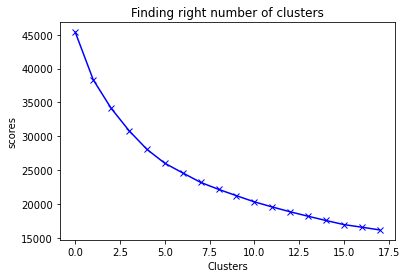

In [306]:
#so we reduced our df, like PCA. now we apply it to KMeans
#but 1st we have to identify how many cluster do I need 
#find the optimize cluster 
scores_2 = []

range_values = range(2, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

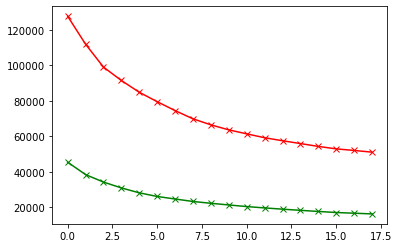

In [307]:
#so earlier we have also plot another Elbow plot
#we try to compare both  here 
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
#previously we use 8 cluster , now we can see I can use 4 cluster 

In [308]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [309]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [310]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.229544,0.087847
1,0.956210,1.626546
2,-0.086631,-0.203577
3,0.009016,0.017055
4,-1.164418,0.101773


In [311]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.229544,0.087847,0
1,0.956210,1.626546,2
2,-0.086631,-0.203577,0
3,0.009016,0.017055,0
4,-1.164418,0.101773,0


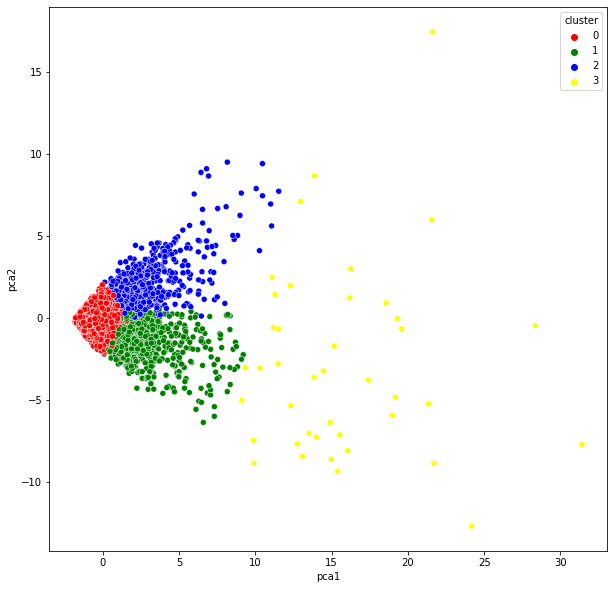

In [312]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()